<a href="https://colab.research.google.com/github/Bzrm/MidRusNLP/blob/master/misc/%D0%A2%D0%B5%D0%B3%D0%B5%D1%80%20%D0%BD%D0%B0%20all_afz/POS_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

Загружаем файлы:

pred - POSы, которые были размечены изначально

true - POSы, которые выдала обученная модель

lables - все теги POS

In [0]:
!wget https://raw.githubusercontent.com/Bzrm/MidRusNLP/master/misc/%D0%A2%D0%B5%D0%B3%D0%B5%D1%80%20%D0%BD%D0%B0%20all_afz/pred_POS_rd.txt
!wget https://raw.githubusercontent.com/Bzrm/MidRusNLP/master/misc/%D0%A2%D0%B5%D0%B3%D0%B5%D1%80%20%D0%BD%D0%B0%20all_afz/true_POS_rd.txt
!wget https://raw.githubusercontent.com/Bzrm/MidRusNLP/master/misc/%D0%A2%D0%B5%D0%B3%D0%B5%D1%80%20%D0%BD%D0%B0%20all_afz/labels.txt

--2019-11-23 21:07:28--  https://raw.githubusercontent.com/Bzrm/MidRusNLP/master/misc/%D0%A2%D0%B5%D0%B3%D0%B5%D1%80%20%D0%BD%D0%B0%20all_afz/pred_POS_rd.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3315432 (3.2M) [text/plain]
Saving to: ‘pred_POS_rd.txt’

pred_POS_rd.txt     100%[===================>]   3.16M  --.-KB/s    in 0.04s   

2019-11-23 21:07:28 (90.2 MB/s) - ‘pred_POS_rd.txt’ saved [3315432/3315432]

--2019-11-23 21:07:29--  https://raw.githubusercontent.com/Bzrm/MidRusNLP/master/misc/%D0%A2%D0%B5%D0%B3%D0%B5%D1%80%20%D0%BD%D0%B0%20all_afz/true_POS_rd.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.10

In [0]:
pred = open('pred_POS_rd.txt', encoding='utf8').read()
true = open('true_POS_rd.txt', encoding='utf8').read()
labels = open('labels.txt', encoding='utf8').read()

In [0]:
y_true = true.split()
y_pred = pred.split()
class_names = labels.split()

Создаем матрицу

In [0]:
cnf_matrix = confusion_matrix(y_pred, y_true, labels=class_names)

Задаем функцию для вывода матрицы

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Выводим матрицу

Normalized confusion matrix


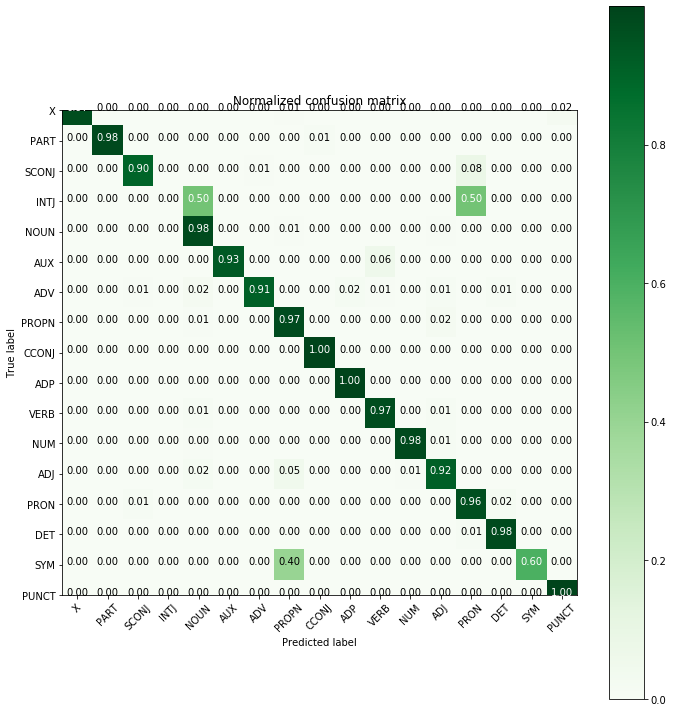

In [0]:
np.set_printoptions(precision=2)

plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')